In [22]:
import re
import unicodedata
import pandas as pd
import nltk
from wordcloud import WordCloud
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

import env
import acquire
import prepare

1) Spam Data

a) Load the spam data set.

In [2]:
url = env.get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


b) Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [3]:
df = prepare.prep_text(df, 'text')
df

,label,text,clean,stemmed,lemmatized
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u a750 pound prize ...,2nd time tri 2 contact u u a750 pound prize 2 ...,2nd time tried 2 contact u u a750 pound prize ...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home,b go esplanad fr home,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions,piti mood soani suggest,pity mood soany suggestion


In [7]:
#split the dataframe into spam and ham text
spam = df[df.label == 'spam']
ham = df[df.label == 'ham']

#Join them all into one string
spam_words = ' '.join(spam.lemmatized)
ham_words = ' '.join(ham.lemmatized)

#Create bigrams for both the spam and ham messages
spam_bigrams = pd.Series(nltk.ngrams(spam_words.split(), 2))
ham_bigrams = pd.Series(nltk.ngrams(ham_words.split(), 2))

top_20_spam_bigrams = spam_bigrams.value_counts().head(20).sort_values(ascending = False)

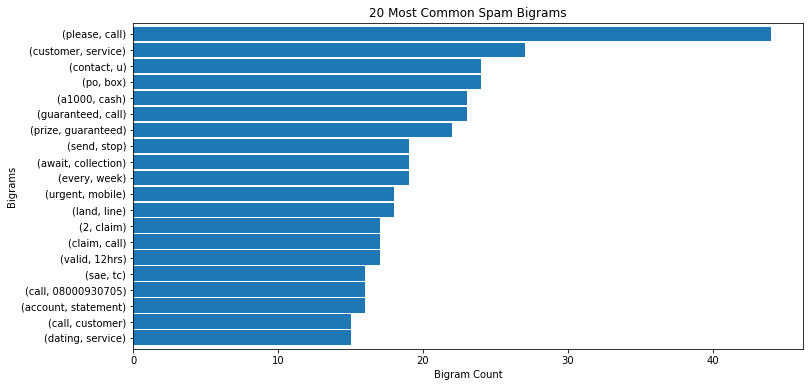

In [10]:
# Visualize the top 20 spam bigrams
top_20_spam_bigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Bigram Count')
plt.ylabel('Bigrams')
plt.title('20 Most Common Spam Bigrams')
plt.show()

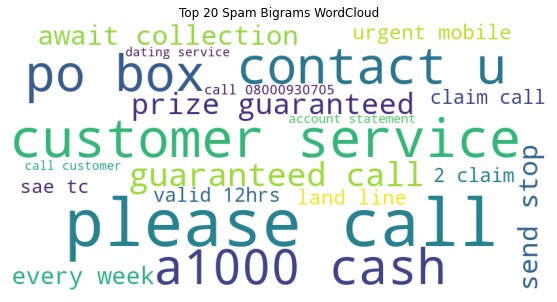

In [11]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_20_spam_bigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Spam Bigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

In [12]:
top_20_ham_bigrams = ham_bigrams.value_counts().head(20).sort_values(ascending = False)
top_20_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        41
(sorry, ill)       39
(r, u)             37
(u, r)             34
(dont, know)       32
(good, morning)    31
(wan, 2)           31
(new, year)        30
(take, care)       26
(im, going)        24
(u, get)           23
(u, wan)           23
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(ltgt, min)        19
dtype: int64

In [13]:
# Create dataframe to explore ham bigrams
top_20_ham_bigrams = ham_bigrams.value_counts().head(20).sort_values(ascending = False)
top_20_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        41
(sorry, ill)       39
(r, u)             37
(u, r)             34
(dont, know)       32
(good, morning)    31
(wan, 2)           31
(new, year)        30
(take, care)       26
(im, going)        24
(u, get)           23
(u, wan)           23
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(ltgt, min)        19
dtype: int64

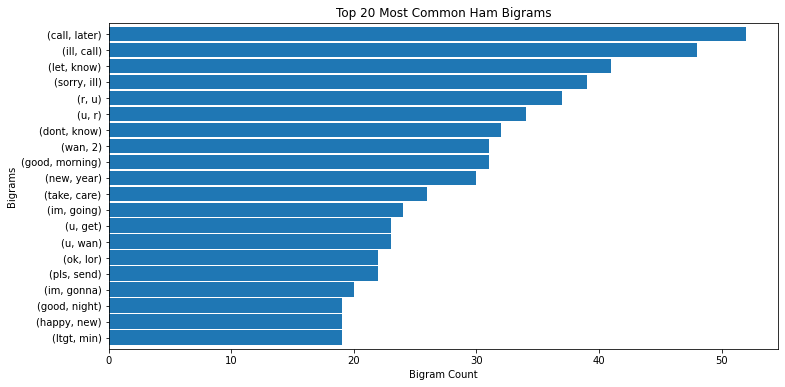

In [14]:
#Visualization the ham bigrams
top_20_ham_bigrams.sort_values().plot.barh(width = 0.9, figsize = (12,6))
plt.title('Top 20 Most Common Ham Bigrams')
plt.xlabel('Bigram Count')
plt.ylabel('Bigrams')
plt.show()

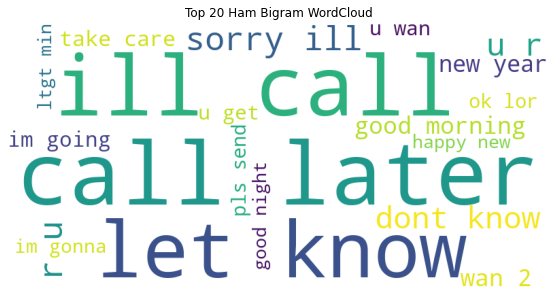

In [15]:
#Create a word cloud of the ham bigrams
#Create dictionary for the frequencies
data = {k[0] + ' ' + k[1]: count for k, count in top_20_ham_bigrams.to_dict().items()}

#change the figsize before creating the wordcloud
plt.figure(figsize=(10,5))
image = WordCloud(background_color = 'white', width= 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Ham Bigram WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()


c) Is there any overlap in the bigrams for the spam data and the ham data?



No but the word call appears frequently in both


d) Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [17]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words.split(), 3))
ham_trigrams = pd.Series(nltk.ngrams(ham_words.split(), 3))

#Find the top 20 spam and ham trigrams
top_20_spam_trigrams = spam_trigrams.value_counts().head(20)
top_20_ham_trigrams = ham_trigrams.value_counts().head(20)

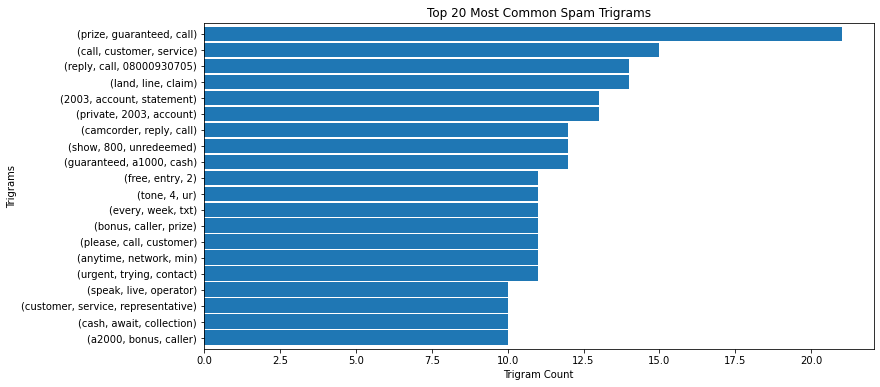

In [18]:
#Visualize the top 20 spam trigrams
top_20_spam_trigrams.sort_values().plot.barh(width = 0.9, figsize=(12,6))
plt.title('Top 20 Most Common Spam Trigrams')
plt.xlabel('Trigram Count')
plt.ylabel('Trigrams')
plt.show()

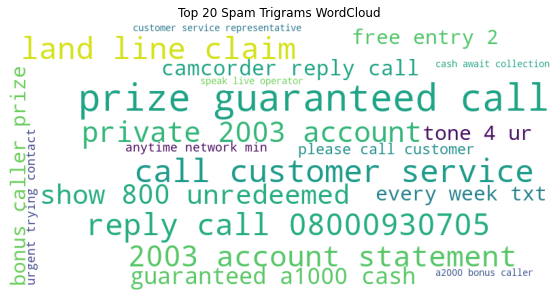

In [19]:
#Create a wordcloud for the spam trigrams
#Create the dictionary for the frequencies
data = {k[0] + ' ' + k[1] + ' ' + k[2]: count for k, count in top_20_spam_trigrams.to_dict().items()}


plt.figure(figsize=(10,5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Spam Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

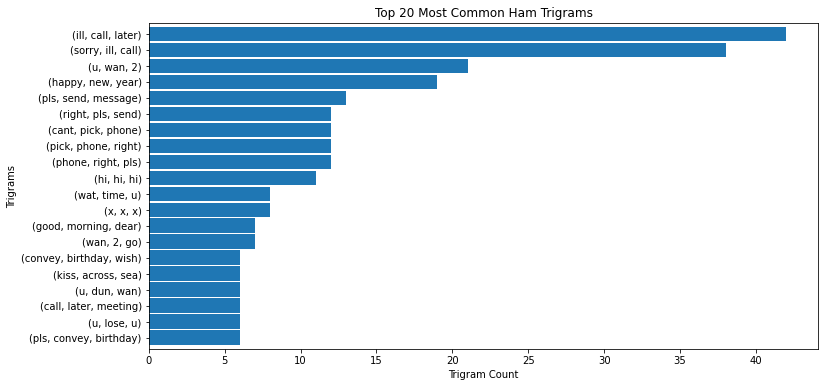

In [20]:
#Create visualizations for the ham trigrams
top_20_ham_trigrams.sort_values().plot.barh(width=0.9, figsize=(12,6))
plt.title('Top 20 Most Common Ham Trigrams')
plt.xlabel('Trigram Count')
plt.ylabel('Trigrams')
plt.show()

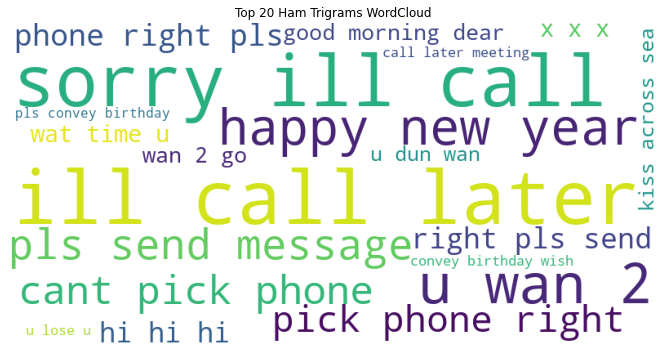

In [21]:
#Create the ham trigram wordcloud

#First create the dictionary for the frequencies
data = {k[0] + ' ' + k[1] + ' ' + k[2]: count for k, count in top_20_ham_trigrams.to_dict().items()}

#Create the image
plt.figure(figsize=(12,6))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Ham Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

2. Explore the blog articles using the techniques discussed in the exploration lesson.


In [25]:
# acquire
codeup_df = acquire.get_blog_posts()
codeup_df

,title,content
0,What Jobs Can You Get After a Coding Bootcamp?...,Have you been considering a career in Cloud Ad...
1,What Jobs Can You Get After a Coding Bootcamp?...,If you are interested in embarking on a career...
2,Is Our Cloud Administration Program Right for ...,Changing careers can be scary. The first thing...
3,5 Reasons To Attend Our New Cloud Administrati...,Come Work In The Cloud\nWhen your Monday rolls...
4,What Jobs Can You Get After a Coding Bootcamp?...,Have you been considering a career in Cloud Ad...
5,What Jobs Can You Get After a Coding Bootcamp?...,If you are interested in embarking on a career...
6,In-Person Workshop: Learn to Code – JavaScript...,Join us for our live in-person JavaScript cras...
7,In-Person Workshop: Learn to Code – Python on ...,"According to LinkedIn, the “#1 Most Promising ..."
8,Free JavaScript Workshop at Codeup Dallas on 6/28,Event Info: \nLocation – Codeup Dallas\nTime –...
9,Is Our Cloud Administration Program Right for ...,Changing careers can be scary. The first thing...


In [33]:
# renaming column name
codeup_df.rename(columns={'content':'original'}, inplace=True)

df = prepare.prep_article_data(codeup_df,'original', extra_words=['ha'],exclude_words=['no'])
df

,title,original,clean,stemmed,lemmatized
0,What Jobs Can You Get After a Coding Bootcamp?...,Have you been considering a career in Cloud Ad...,considering career cloud administration no ide...,consid career cloud administr no idea job titl...,considering career cloud administration no ide...
1,What Jobs Can You Get After a Coding Bootcamp?...,If you are interested in embarking on a career...,interested embarking career tech youre probabl...,interest embark career tech your probabl wonde...,interested embarking career tech youre probabl...
2,Is Our Cloud Administration Program Right for ...,Changing careers can be scary. The first thing...,changing careers scary first thing may asking ...,chang career scari first thing may ask begin l...,changing career scary first thing may asking b...
3,5 Reasons To Attend Our New Cloud Administrati...,Come Work In The Cloud\nWhen your Monday rolls...,come work cloud monday rolls around start get ...,come work cloud monday roll around start get s...,come work cloud monday roll around start get s...
4,What Jobs Can You Get After a Coding Bootcamp?...,Have you been considering a career in Cloud Ad...,considering career cloud administration no ide...,consid career cloud administr no idea job titl...,considering career cloud administration no ide...
5,What Jobs Can You Get After a Coding Bootcamp?...,If you are interested in embarking on a career...,interested embarking career tech youre probabl...,interest embark career tech your probabl wonde...,interested embarking career tech youre probabl...
6,In-Person Workshop: Learn to Code – JavaScript...,Join us for our live in-person JavaScript cras...,join us live inperson javascript crash course ...,join us live inperson javascript crash cours d...,join u live inperson javascript crash course d...
7,In-Person Workshop: Learn to Code – Python on ...,"According to LinkedIn, the “#1 Most Promising ...",according linkedin 1 promising job data scienc...,accord linkedin 1 promis job data scienc one m...,according linkedin 1 promising job data scienc...
8,Free JavaScript Workshop at Codeup Dallas on 6/28,Event Info: \nLocation – Codeup Dallas\nTime –...,event info location codeup dallas time 6 pm co...,event info locat codeup dalla time 6 pm come l...,event info location codeup dallas time 6 pm co...
9,Is Our Cloud Administration Program Right for ...,Changing careers can be scary. The first thing...,changing careers scary first thing may asking ...,chang career scari first thing may ask begin l...,changing career scary first thing may asking b...


3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [23]:
news_df = acquire.get_news_articles()
news_df

,title,content,category
0,Veteran Bollywood singer Bhupinder Singh passe...,Veteran Bollywood playback and ghazal singer B...,national
1,West can't isolate Russia & reverse its develo...,Russian President Vladimir Putin said on Monda...,national
2,CBI arrests 8 persons for alleged malpractices...,The Central Bureau of Investigation (CBI) arre...,national
3,"If I get 20 minutes with Virat Kohli, I might ...","Amid Virat Kohli's poor form, Sunil Gavaskar s...",national
4,Hardik Pandya shares video of his journey from...,Team India all-rounder Hardik Pandya took to s...,national
...,...,...,...
295,J&K LG announces 10% reservation for 'Agniveer...,J&K LG Manoj Sinha on Sunday announced a 10% r...,automobile
296,Bajrang Dal activist attacked in Uttar Pradesh,"A Bajrang Dal activist, Prashant Saini, was at...",automobile
297,UK residents asked to stay indoors as temp exp...,People in the UK are being advised to stay ind...,automobile
298,Nearly half of EU territory at drought risk as...,Nearly half of EU's territory is at risk of dr...,automobile
